# How to pull in SNOTEL and CCSS data from this repository (and some use cases) 
Eric Gagliano (egagli@uw.edu)   
February 7th, 2024

Thanks for checking out this notebook! My hope is that this repository makes it easier to retrieve daily SNOTEL and CCSS data without having to do clunky downloads and conversions. Snow depth / SWE / PRCPSA are in meters, temperatures are in celsius. The only required packages you'll need are geopandas and pandas, the rest of the imports are for applications :)

In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import tqdm
import contextily as ctx

## View all SNOTEL & CCSS stations

### Read the geojson stored at https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/all_stations.geojson
- The daily recurring github action should regularly update the "endDate" column. Set the index of the geodataframe to the code column.

In [38]:
all_stations = gpd.read_file('https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/all_stations.geojson').set_index('code')

HTTPError: HTTP Error 404: Not Found

In [3]:
all_stations

,name,network,elevation_m,latitude,longitude,county,state,HUC,mgrs,mountainRange,beginDate,endDate,geometry
code,,,,,,,,,,,,,
301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,41.235828,-120.791924,Modoc,California,180200021403,10TFL,Great Basin Ranges,1983-10-01,2024-02-05,POINT (-120.79192 41.23583)
907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,37.522171,-112.271179,Kane,Utah,160300020301,12SUG,Colorado Plateau,1994-10-01,2024-02-05,POINT (-112.27118 37.52217)
916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,45.597229,-111.959023,Madison,Montana,100200050701,12TVR,Central Montana Rocky Mountains,1996-09-01,2024-02-05,POINT (-111.95902 45.59723)
1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,61.749668,-150.889664,Matanuska-Susitna,Alaska,190205051106,05VPJ,NaN,2014-08-28,2024-02-05,POINT (-150.88966 61.74967)
908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,47.779572,-121.698471,King,Washington,171100100501,10TET,Cascade Range,1994-09-01,2024-02-05,POINT (-121.69847 47.77957)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLT,Slate Creek,CCSS,1737.360000,41.043980,-122.480103,Shasta,California,180200050304,10TEL,Klamath Mountains,2004-10-01,2024-02-07,POINT (-122.48010 41.04398)
SLI,Slide Canyon,CCSS,2804.160000,38.091234,-119.431881,Tuolumne,California,180400090501,11SKC,Sierra Nevada,2005-10-01,2024-02-07,POINT (-119.43188 38.09123)
SLK,South Lake,CCSS,2926.080000,37.175903,-118.562660,Inyo,California,180901020601,11SLB,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.56266 37.17590)


### Use geopandas .explore() on the all_stations geodataframe to interactively view the stations 
- Color by network: red is SNOTEL, blue is CCSS.

In [4]:
all_stations.astype(dict(beginDate=str, endDate=str)).explore(column='network',cmap='bwr')

## Read a singular CSV: Check out the SNOTEL station at Paradise, WA

### Place a station code (which you can find in this interactive plot, or by other means) in the url: https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/data/{station_id}.csv
- For SNOTEL stations, this will be of the form {unique number}_{two letter state abbreviation}_SNTL (e.g. 679_WA_SNTL).   
- For CCSS stations, this will be a three letter code (e.g. BLK).   
- Use pd.read_csv() with index_col='datetime' and parse_dates=True so we interpret the datetime column as pandas datetimes.

In [5]:
station_id = '679_WA_SNTL'
paradise_snotel = pd.read_csv(f'https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/data/{station_id}.csv',index_col='datetime', parse_dates=True)

In [6]:
paradise_snotel

,TAVG,TMIN,TMAX,SNWD,WTEQ,PRCPSA
datetime,,,,,,
1988-09-30,0.0,0.0,0.0,NaN,0.000000,0.00000
1988-10-01,0.0,0.0,0.0,NaN,0.000000,0.00000
1988-10-02,0.0,0.0,0.0,NaN,0.000000,0.00000
1988-10-03,0.0,0.0,0.0,NaN,0.000000,0.00000
1988-10-04,0.0,0.0,0.0,NaN,0.000000,0.00000
...,...,...,...,...,...,...
2024-02-02,0.8,-1.8,3.3,1.828799,0.883920,0.00000
2024-02-03,-1.5,-3.5,0.8,1.777999,0.881380,0.00254
2024-02-04,-0.2,-3.2,3.8,1.701799,0.883920,0.00254


### Try a simple plot of snow depth and SWE
- Select the column of interest and use pandas built in .plot()

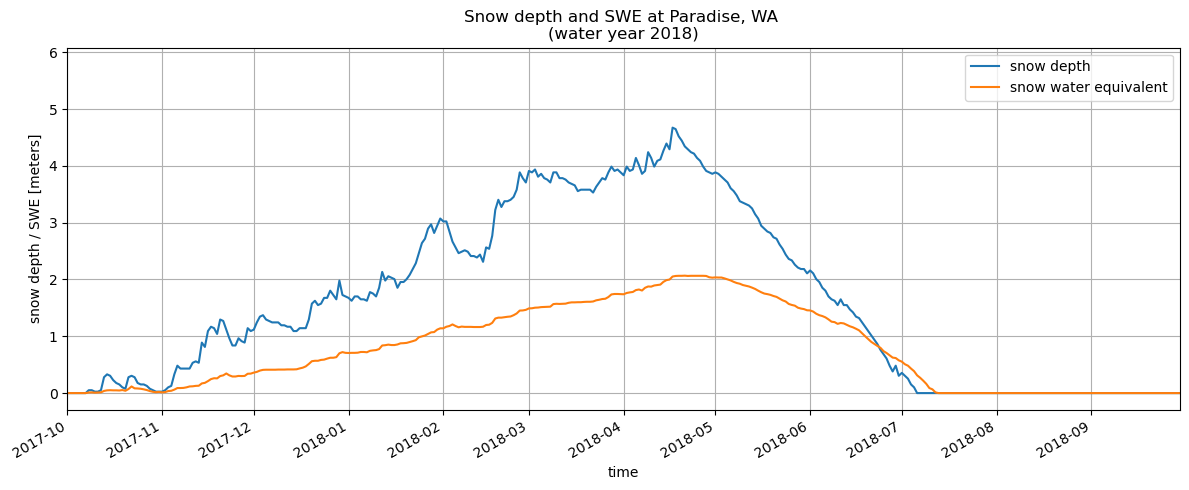

In [7]:
f,ax=plt.subplots(figsize=(12,5))

paradise_snotel['SNWD'].plot(ax=ax,label='snow depth')
paradise_snotel['WTEQ'].plot(ax=ax,label='snow water equivalent')

ax.set_xlim(pd.to_datetime(['2017-10-01','2018-09-30']))

ax.grid()
ax.legend()

ax.set_xlabel('time')
ax.set_ylabel('snow depth / SWE [meters]')
ax.set_title('Snow depth and SWE at Paradise, WA \n(water year 2018)')

f.tight_layout()

### Try a more complex plot that shows current snow depth against statistics calculated from the entire time series for each day of water year
- Water year is conceptual 12 month period used to describe when the bulk of precipitation falls, mostly used for hydrology attribution 
    - In the northern hemisphere, we usually define the water year to start October 1st and go until September 30th (e.g. water year 2017: October 1st, 2016 - September 30th, 2017)
    - So October 1st is DOWY 1
- Try a function like datetime_to_DOWY() shown below to convert datetimes to day of water year and add a dedicated DOWY column
    - This function should account for leap years
- Then use pandas groupby functionality to calculate stats per DOWY
- Plot these stats
    - Thanks David Shean for the plot inspiration!

In [8]:
def datetime_to_DOWY(date):
    if date.month < 10 or (date.month == 10 and date.day < 1):
        start_of_water_year = pd.Timestamp(year=date.year-1, month=10, day=1)
    else:
        start_of_water_year = pd.Timestamp(year=date.year, month=10, day=1)
    return (date - start_of_water_year).days + 1

In [9]:
paradise_snotel['DOWY'] = paradise_snotel.index.map(datetime_to_DOWY)

In [10]:
stat_list = ['min','max','mean','std','median']
paradise_snotel_DOWY_snwd_stats = paradise_snotel.groupby('DOWY').agg(stat_list)['SNWD']
paradise_snotel_DOWY_snwd_stats

,min,max,mean,std,median
DOWY,,,,,
1,0.0,0.2286,0.014111,0.053862,0.0
2,0.0,0.2032,0.011289,0.047895,0.0
3,0.0,0.2286,0.014111,0.053862,0.0
4,0.0,0.1270,0.012700,0.032888,0.0
5,0.0,0.1270,0.012700,0.034022,0.0
...,...,...,...,...,...
362,0.0,0.0254,0.001411,0.005987,0.0
363,0.0,0.0254,0.001411,0.005987,0.0
364,0.0,0.0254,0.002822,0.008214,0.0


In [11]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
current_WY = slice(f'{int(today[0:4])-1}-10-01',f'{today}')
current_WY_paradise_snotel = paradise_snotel[current_WY.start:current_WY.stop]

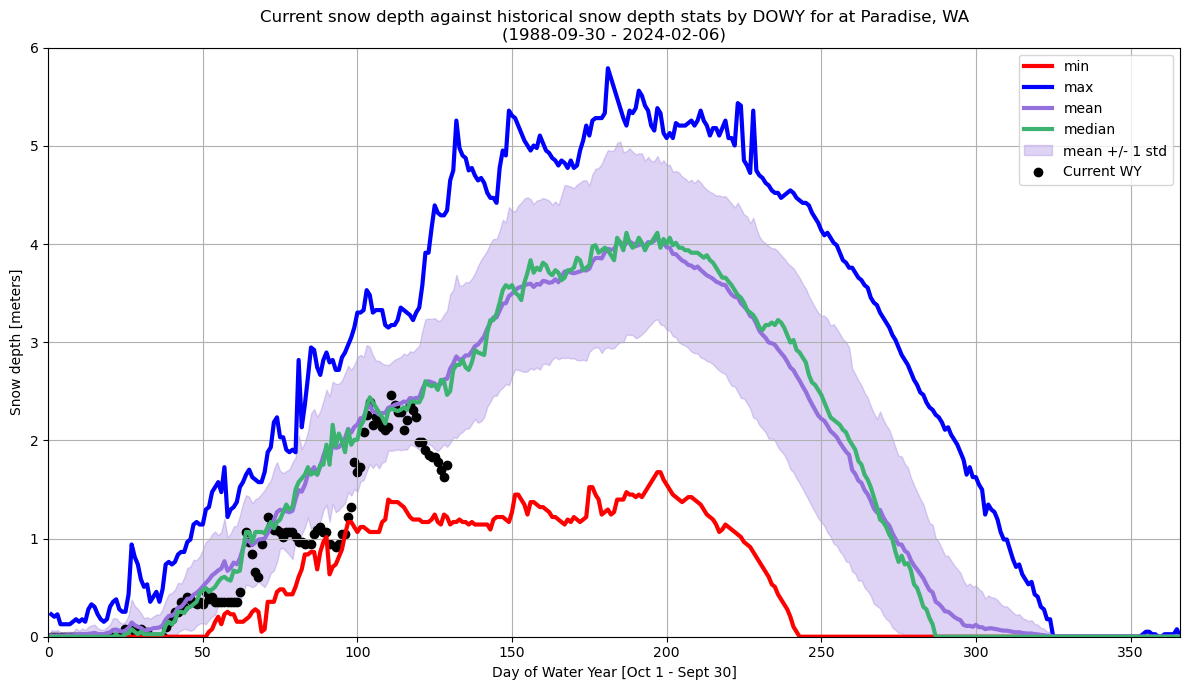

In [12]:
f,ax=plt.subplots(figsize=(12,7))

for stat,stat_color in zip(['min','max','mean','median'],['red','blue','mediumpurple','mediumseagreen']):
    ax.plot(paradise_snotel_DOWY_snwd_stats.index, paradise_snotel_DOWY_snwd_stats[stat], label=stat, color=stat_color, linewidth=3)
    
ax.fill_between(paradise_snotel_DOWY_snwd_stats.index, paradise_snotel_DOWY_snwd_stats['mean'] - paradise_snotel_DOWY_snwd_stats['std'], paradise_snotel_DOWY_snwd_stats['mean'] + paradise_snotel_DOWY_snwd_stats['std'], color='mediumpurple', alpha=0.3, label='mean +/- 1 std')

ax.scatter(current_WY_paradise_snotel.DOWY,current_WY_paradise_snotel.SNWD, marker='o', color= 'black', label='Current WY')

ax.set_xlim([0,366])
ax.set_ylim([0,6])

ax.grid()
ax.legend()

ax.set_title(f'Current snow depth against historical snow depth stats by DOWY for at Paradise, WA\n({paradise_snotel.index.min().date()} - {paradise_snotel.index.max().date()})')
ax.set_xlabel('Day of Water Year [Oct 1 - Sept 30]')
ax.set_ylabel('Snow depth [meters]')
f.tight_layout()

## Read a variable from multiple CSVs by looping over a list of stations: Check out SWE from a SNOTEL and CCSS station (that may be referring to the same physical station??) 

### Create a list of the stations we are interested in, loop through and add data to a dictionary with the station code as the key, then read into pandas using from_dict()
- Initialize with an empty dict and append to it in the loop

In [13]:
station_list = ['356_CA_SNTL','BLK']

station_dict = {}

for station in station_list:
    tmp = pd.read_csv(f'https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/data/{station}.csv',index_col='datetime',parse_dates=True)['WTEQ']
    station_dict[station] = tmp

stations_swe = pd.DataFrame.from_dict(station_dict).dropna()

In [14]:
stations_swe

,356_CA_SNTL,BLK
datetime,,
1980-10-01,0.00000,0.00000
1980-10-02,0.00000,0.00000
1980-10-03,0.00000,0.00000
1980-10-04,0.00000,0.00000
1980-10-05,0.00000,0.00000
...,...,...
2024-02-02,0.25654,0.25654
2024-02-03,0.26416,0.26416
2024-02-04,0.26924,0.26924


### Plot the two stations on the same axis
- If we properly set the index as the datetime, and we used parse_dates=True, these should line up!

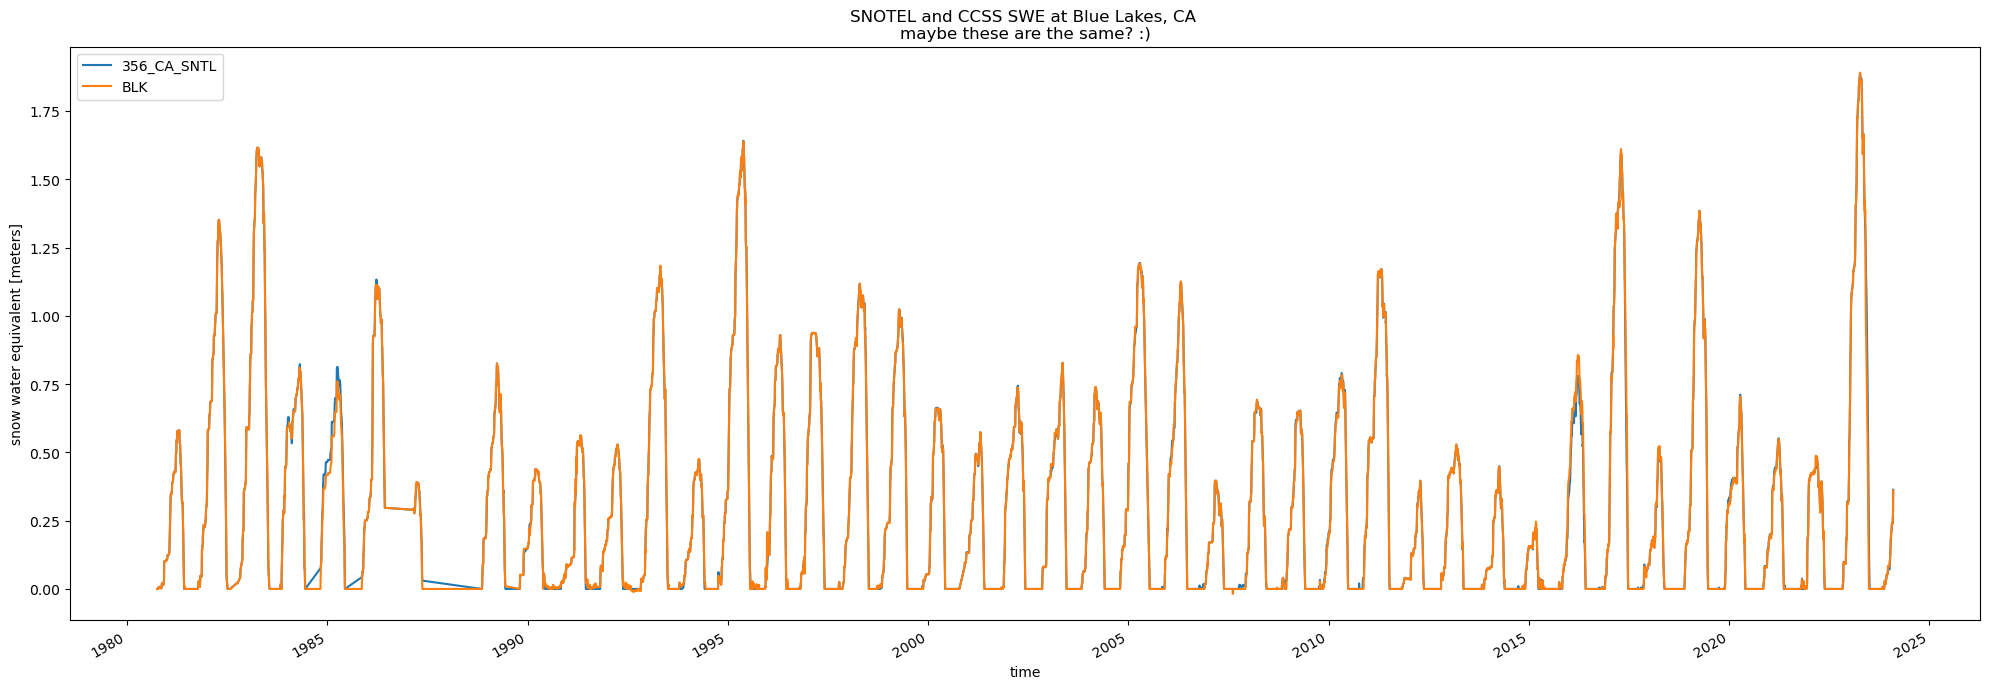

In [15]:
f,ax=plt.subplots(figsize=(20,7))

stations_swe.plot(ax=ax)

ax.legend()

ax.set_xlabel('time')
ax.set_ylabel('snow water equivalent [meters]')
ax.set_title('SNOTEL and CCSS SWE at Blue Lakes, CA \nmaybe these are the same? :)')

f.tight_layout()

### These look oddly similar... let's check out their correlation
- Can use built in .corr()

In [16]:
stations_swe.corr()

,356_CA_SNTL,BLK
356_CA_SNTL,1.000000,0.999052
BLK,0.999052,1.000000


- These correlation values, along with the time series above, makes me think these are way too similar... no way these would agree this much even if the stations were right next to each other!

### Let's see where they exist spatially
- Select the stations by index and reproject to UTM 11N
- Use contextily for a basemap

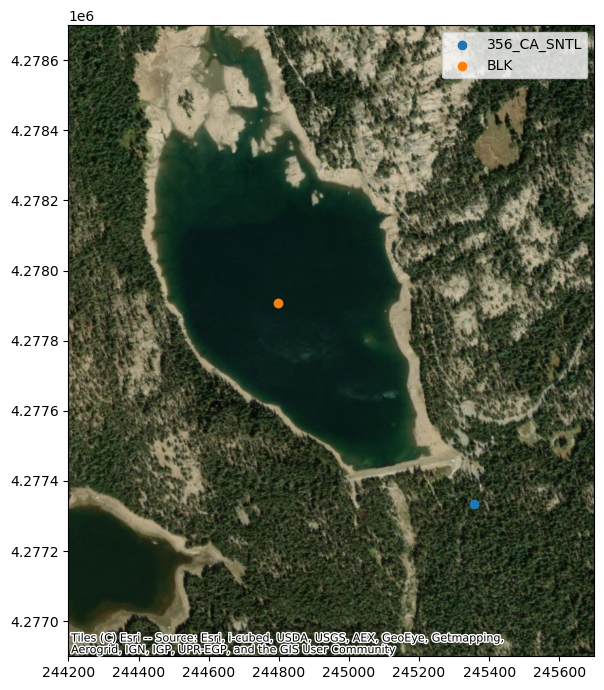

In [17]:
f,ax=plt.subplots(figsize=(7,7))

all_stations[all_stations.index=='356_CA_SNTL'].to_crs('EPSG:32611').plot(ax=ax, color='tab:blue',label='356_CA_SNTL')
all_stations[all_stations.index=='BLK'].to_crs('EPSG:32611').plot(ax=ax, color='tab:orange',label='BLK')

ax.set_xlim([244200,245700])
ax.set_ylim([4276900,4278700])

ctx.add_basemap(ax, crs='EPSG:32611', source=ctx.providers.Esri.WorldImagery)

ax.legend()

f.tight_layout()

- Interesting locations :) Based on correlation and location, I'm going to say these are the same! Wonder what those tiny differences are about...

## Read a variable from multiple CSVs by looping over a subset of the geodataframe: Check out the California 2023 snowpack at the CCSS stations
- Select only CCSS stations by creating an index where network equals CCSS
- Loop through the CCSS stations and create a dataframe as we did earlier

In [18]:
ccss_stations = all_stations[all_stations['network']=='CCSS']

In [19]:
ccss_stations

,name,network,elevation_m,latitude,longitude,county,state,HUC,mgrs,mountainRange,beginDate,endDate,geometry
code,,,,,,,,,,,,,
FRW,Farewell Gap,CCSS,2895.60,36.415211,-118.578979,Tulare,California,180300070202,11SLA,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.57898 36.41521)
BNK,Bonanza King,CCSS,1965.96,41.083118,-122.631271,Trinity,California,180102110304,10TEL,Klamath Mountains,2011-01-03,2024-02-07,POINT (-122.63127 41.08312)
CDP,Cedar Pass,CCSS,2164.08,41.583000,-120.303000,Modoc,California,180200020603,10TGM,Great Basin Ranges,NaT,NaT,POINT (-120.30300 41.58300)
CRL,Charlotte Lake,CCSS,3169.92,36.777523,-118.426010,Fresno,California,180300100206,11SLA,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.42601 36.77752)
CHM,Chilkoot Meadow,CCSS,2179.32,37.408390,-119.492188,Madera,California,180400061101,11SKB,Sierra Nevada,2006-10-01,2024-02-07,POINT (-119.49219 37.40839)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLT,Slate Creek,CCSS,1737.36,41.043980,-122.480103,Shasta,California,180200050304,10TEL,Klamath Mountains,2004-10-01,2024-02-07,POINT (-122.48010 41.04398)
SLI,Slide Canyon,CCSS,2804.16,38.091234,-119.431881,Tuolumne,California,180400090501,11SKC,Sierra Nevada,2005-10-01,2024-02-07,POINT (-119.43188 38.09123)
SLK,South Lake,CCSS,2926.08,37.175903,-118.562660,Inyo,California,180901020601,11SLB,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.56266 37.17590)


In [20]:
%%time 
station_dict = {}

for station in tqdm.tqdm(ccss_stations.index):
    try:
        tmp = pd.read_csv(f'https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/data/{station}.csv',index_col='datetime',parse_dates=True)['SNWD']
        station_dict[station] = tmp
    except:
        print(f'failed to retrieve {station}')

ccss_stations_snwd = pd.DataFrame.from_dict(station_dict).dropna(how='all')

100%|██████████| 132/132 [00:38<00:00,  3.45it/s]


CPU times: user 8.49 s, sys: 663 ms, total: 9.16 s
Wall time: 39.4 s


In [21]:
ccss_stations_snwd

,FRW,BNK,CDP,CRL,CHM,HHM,HNT,MUM,SDF,REL,...,LLP,FOR,GEM,HRF,WTM,SLT,SLI,SLK,STL,TMR
datetime,,,,,,,,,,,,,,,,,,,,,
1996-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,1.041400,1.320799,NaN,NaN,1.168399,NaN,NaN,NaN,1.930399,NaN,...,2.768599,NaN,0.0,NaN,0.736600,NaN,1.549399,0.5334,1.066799,0.711200
2024-02-03,1.041400,1.422399,NaN,NaN,1.244599,NaN,0.939800,NaN,1.879599,NaN,...,2.997198,NaN,0.0,NaN,0.787400,NaN,1.676399,0.4826,1.066799,0.711200
2024-02-04,0.990599,1.396999,NaN,NaN,1.320799,NaN,0.965199,NaN,1.854199,NaN,...,2.946398,NaN,0.0,NaN,0.812800,NaN,1.650999,0.4064,1.066799,0.787400


### Let's check out the percent of normal snow depth for April 1st, 2023 (California got a lot of snow in 2023!!)
- Let's add a DOWY column like before, groupby DOWY, apply a median, and divide the observation on April 1st, 2023 by the DOWY 183 (April 1) median
- Will need to do some slight cleaning to get rid of NaNs, Infs, physically impossible values...

In [22]:
ccss_stations_snwd['DOWY'] = ccss_stations_snwd.index.map(datetime_to_DOWY)

In [23]:
ccss_stations.loc[:,'april2023_percent_norm'] = 100*(ccss_stations_snwd['2023-04-01':'2023-04-01'].squeeze() / ccss_stations_snwd.groupby('DOWY').median().loc[183])

/srv/conda/envs/notebook/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [24]:
ccss_stations = ccss_stations.dropna(subset='april2023_percent_norm')
ccss_stations = ccss_stations[ccss_stations['april2023_percent_norm']<7500]

### View the values in order...
- Use .sort_values() function to get an idea of percent normal snow depth values!

In [25]:
ccss_stations.sort_values('april2023_percent_norm',ascending=False)

,name,network,elevation_m,latitude,longitude,county,state,HUC,mgrs,mountainRange,beginDate,endDate,geometry,april2023_percent_norm
code,,,,,,,,,,,,,,
FLL,Fallen Leaf Lake,CCSS,1905.0000,38.932000,-120.056000,El Dorado,California,160501010401,10SGJ,NaN,2004-10-01,2024-02-07,POINT (-120.05600 38.93200),1000.000066
DPO,Devils Postpile,CCSS,2307.0312,37.629410,-119.084671,Madera,California,180400060402,11SLB,Sierra Nevada,2007-10-01,2024-02-07,POINT (-119.08467 37.62941),647.272765
KUP,Upper Providence,CCSS,1710.2328,37.061000,-119.183000,Fresno,California,180300100502,11SLB,Sierra Nevada,2019-12-18,2024-02-07,POINT (-119.18300 37.06100),625.641030
RCK,Rock Creek Lakes,CCSS,2956.5600,37.457275,-118.735023,Inyo,California,180901020301,11SLB,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.73502 37.45728),566.666667
TMR,Tamarack Summit,CCSS,2301.2400,37.163750,-119.200531,Fresno,California,180400060903,11SLB,Sierra Nevada,2011-01-01,2024-02-07,POINT (-119.20053 37.16375),546.428539
KUB,Upper Bull,CCSS,2460.6504,36.966900,-119.056600,Fresno,California,180300100503,11SLA,Sierra Nevada,2019-12-18,2024-02-07,POINT (-119.05660 36.96690),517.647057
CWD,Cottonwood Lakes,CCSS,3093.7200,36.483829,-118.177559,Inyo,California,180901030404,11SLA,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.17756 36.48383),473.076937
PSR,Poison Ridge,CCSS,2103.1200,37.402821,-119.520813,Madera,California,180400061101,11SKB,Sierra Nevada,2011-01-01,2024-02-07,POINT (-119.52081 37.40282),436.619729
SLK,South Lake,CCSS,2926.0800,37.175903,-118.562660,Inyo,California,180901020601,11SLB,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.56266 37.17590),417.910434


### Plot the percent of normal snow depths for April 1st, 2023
- Add elevation plot to the right with horizontal dashed line at 100% (normal)

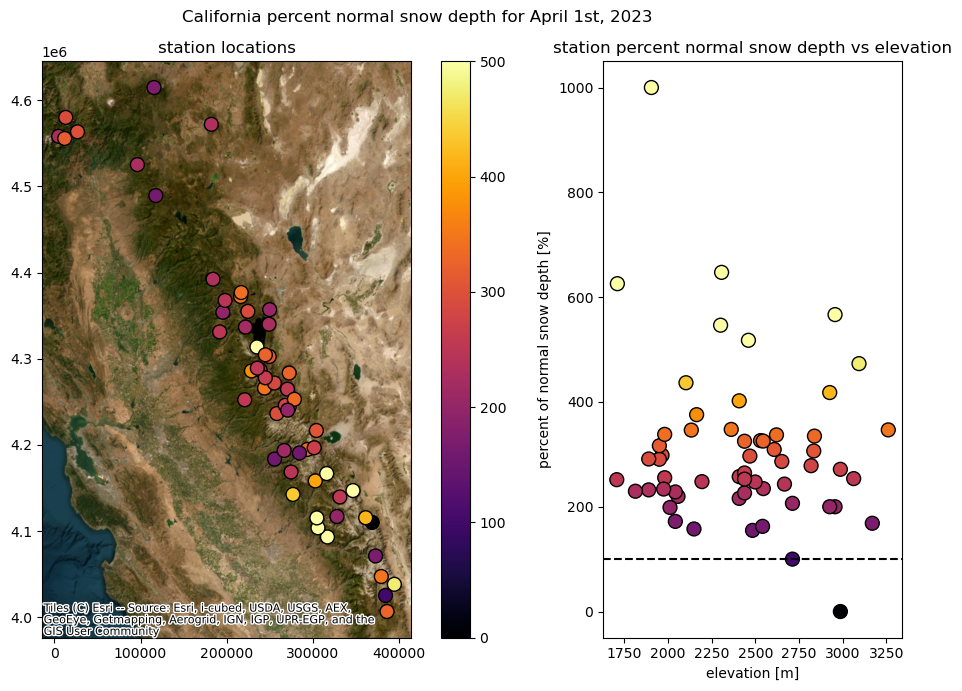

In [26]:
f,ax=plt.subplots(1,2,figsize=(10,7),gridspec_kw={'width_ratios': [2, 1]})

ccss_stations.to_crs('EPSG:32611').plot(ax=ax[0], column='april2023_percent_norm',legend=True,vmin=0,vmax=500,cmap='inferno',edgecolor='black',s=100)

ctx.add_basemap(ax[0], crs='EPSG:32611', source=ctx.providers.Esri.WorldImagery)

ax[0].set_title('station locations')


ax[1].scatter(ccss_stations.elevation_m,ccss_stations.april2023_percent_norm,c=ccss_stations.april2023_percent_norm,cmap='inferno',vmin=0,vmax=500,edgecolors='black',s=100)
ax[1].axhline(y=100,linestyle='--',color='black')

ax[1].set_title('station percent normal snow depth vs elevation')
ax[1].set_xlabel('elevation [m]')
ax[1].set_ylabel('percent of normal snow depth [%]')

f.suptitle(f'California percent normal snow depth for April 1st, 2023')
f.tight_layout()

## Read a variable from all CSVs by looping over the entire geodataframe: How does X Y?

In [27]:
all_stations

,name,network,elevation_m,latitude,longitude,county,state,HUC,mgrs,mountainRange,beginDate,endDate,geometry
code,,,,,,,,,,,,,
301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,41.235828,-120.791924,Modoc,California,180200021403,10TFL,Great Basin Ranges,1983-10-01,2024-02-05,POINT (-120.79192 41.23583)
907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,37.522171,-112.271179,Kane,Utah,160300020301,12SUG,Colorado Plateau,1994-10-01,2024-02-05,POINT (-112.27118 37.52217)
916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,45.597229,-111.959023,Madison,Montana,100200050701,12TVR,Central Montana Rocky Mountains,1996-09-01,2024-02-05,POINT (-111.95902 45.59723)
1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,61.749668,-150.889664,Matanuska-Susitna,Alaska,190205051106,05VPJ,NaN,2014-08-28,2024-02-05,POINT (-150.88966 61.74967)
908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,47.779572,-121.698471,King,Washington,171100100501,10TET,Cascade Range,1994-09-01,2024-02-05,POINT (-121.69847 47.77957)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLT,Slate Creek,CCSS,1737.360000,41.043980,-122.480103,Shasta,California,180200050304,10TEL,Klamath Mountains,2004-10-01,2024-02-07,POINT (-122.48010 41.04398)
SLI,Slide Canyon,CCSS,2804.160000,38.091234,-119.431881,Tuolumne,California,180400090501,11SKC,Sierra Nevada,2005-10-01,2024-02-07,POINT (-119.43188 38.09123)
SLK,South Lake,CCSS,2926.080000,37.175903,-118.562660,Inyo,California,180901020601,11SLB,Sierra Nevada,2004-10-01,2024-02-07,POINT (-118.56266 37.17590)


In [33]:
# import numpy as np

# %%time 
# station_dict = {}

# #for station in tqdm.tqdm(all_stations.index):
# for station in all_stations.index:

#     print(f'station {station}')
#     try:
#         tmp = pd.read_csv(f'https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/data/{station}.csv',index_col='datetime',parse_dates=True)['WTEQ']
#         print(np.unique(tmp.index.duplicated(),return_counts=True))
#         tmp = tmp.loc[~tmp.index.duplicated(keep='first')]  # Drop duplicates
#         station_dict[station] = tmp
#     except:
#         print(f'failed to retrieve {station}')

In [34]:
#station_dict.pop('301_CA_SNTL')

In [35]:
#all_stations_swe = pd.DataFrame.from_dict(station_dict).dropna(how='all')

In [36]:
#all_stations_swe